## Project Description

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [41]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the data file
try:
    df = pd.read_csv('/datasets/car_data.csv')
except:
    df = pd.read_csv('car_data.csv')
    

In [3]:
# Print general information about 'df'
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [4]:
# Print a sample of the data for 'df'
df


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [5]:
# Change the column names to be all lowercase for consistency
df.columns = df.columns.str.lower()


In [6]:
# Remove features that are not relevant to the analysis
df = df.drop(['datecrawled', 'datecreated', 'lastseen', 'postalcode', 'numberofpictures', 'registrationmonth'], axis = 1)
df


,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


In [7]:
# Calculate the percentage of missing values in 'df'
df.isna().sum() / df.shape[0]


price               0.000000
vehicletype         0.105794
registrationyear    0.000000
gearbox             0.055967
power               0.000000
model               0.055606
mileage             0.000000
fueltype            0.092827
brand               0.000000
notrepaired         0.200791
dtype: float64

In [8]:
# Check the distribution of values in the 'notrepaired' column
df.notrepaired.value_counts() / df.notrepaired.shape[0]


no     0.697468
yes    0.101741
Name: notrepaired, dtype: float64

In [9]:
# Since 'no' comprises the majority of the values in the 'notrepaired' column, fill in missing values as 'no'
df.notrepaired.fillna('no', inplace = True)


In [10]:
# Drop all remaining missing values from the dataset
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 284126 entries, 2 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   price             284126 non-null  int64 
 1   vehicletype       284126 non-null  object
 2   registrationyear  284126 non-null  int64 
 3   gearbox           284126 non-null  object
 4   power             284126 non-null  int64 
 5   model             284126 non-null  object
 6   mileage           284126 non-null  int64 
 7   fueltype          284126 non-null  object
 8   brand             284126 non-null  object
 9   notrepaired       284126 non-null  object
dtypes: int64(4), object(6)
memory usage: 23.8+ MB


In [11]:
# Check all all the unique values of 'vehicletype'
df.vehicletype.unique()


array(['suv', 'small', 'sedan', 'convertible', 'bus', 'wagon', 'coupe',
       'other'], dtype=object)

In [12]:
# Check all all the unique values of 'gearbox'
df.gearbox.unique()


array(['auto', 'manual'], dtype=object)

In [13]:
# Check all all the unique values of 'brand'
df.brand.unique()


array(['jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda',
       'nissan', 'renault', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'smart', 'opel', 'audi', 'alfa_romeo', 'subaru', 'volvo',
       'mitsubishi', 'kia', 'hyundai', 'suzuki', 'lancia', 'citroen',
       'toyota', 'chevrolet', 'dacia', 'daihatsu', 'chrysler', 'jaguar',
       'rover', 'porsche', 'saab', 'daewoo', 'land_rover', 'trabant',
       'lada'], dtype=object)

In [14]:
# Check all all the unique values of 'fueltype'
df.fueltype.unique()


array(['gasoline', 'petrol', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

In [15]:
# Change the 'petrol' fueltype to 'gasoline' since they refer to the same type of fuel
df['fueltype'] = df['fueltype'].replace(['petrol'],'gasoline')
df.fueltype


2         gasoline
3         gasoline
4         gasoline
5         gasoline
6         gasoline
            ...   
354362    gasoline
354363    gasoline
354366    gasoline
354367    gasoline
354368    gasoline
Name: fueltype, Length: 284126, dtype: object

In [16]:
# Check all all the unique values of 'model'
df.model.unique()


array(['grand', 'golf', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'twingo', 'a_klasse', 'scirocco',
       '5er', 'arosa', 'civic', 'transporter', 'punto', 'e_klasse', 'one',
       'fortwo', 'clio', '1er', 'b_klasse', 'astra', 'a8', 'jetta',
       'polo', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156',
       'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'slk', '7er', 'corsa', '80', '147',
       'meriva', 'z_reihe', 'sorento', 'v40', 'ibiza', 'mustang', 'eos',
       'touran', 'getz', 'insignia', 'ka', 'megane', 'a3', 'lupo', 'r19',
       'mondeo', 'colt', 'vectra', 'berlingo', 'tiguan', 'sharan',
       '6_reihe', 'c4', 'panda', 'up', 'i_reihe', 'ceed', 'kangoo',
       '5_reihe', 'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe', '6er',
       'fox', 'matiz', 'beetle', 'rio', 'touareg', 'logan', 'caddy',
       'omega', 'cuore', 's_max', 'modus', 'a2', 'galaxy', 'c3', 'viano',
 

<AxesSubplot:>

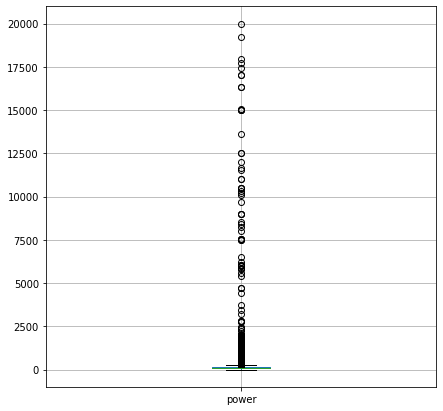

In [17]:
# Create boxplots to examine the distributions of the 'power' column
df.power.plot(kind='box', figsize = (7, 7), grid = True)


In [18]:
# Replace upper outliers and values of 0 horsepower from the 'power' column with the median
q1 = df.power.quantile(0.25)
q3 = df.power.quantile(0.75)
IQR = q3 - q1
med = df['power'].median()

df.loc[df['power'] > (q3 + 1.5 * IQR), 'power'] = med
df.loc[df['power'] == 0, 'power'] = med
df['power'].describe()


count    284126.000000
mean        116.938408
std          43.961944
min           1.000000
25%          82.000000
50%         109.000000
75%         143.000000
max         255.000000
Name: power, dtype: float64

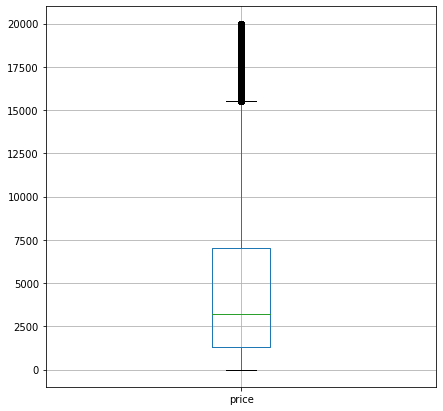

In [19]:
# Create boxplots to examine the distributions of the 'price' column
df.price.plot(kind='box', figsize = (7, 7), grid = True);


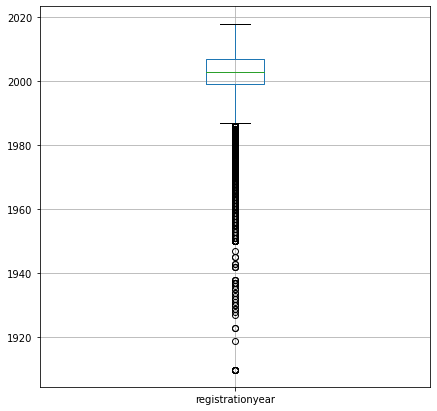

In [20]:
# Create boxplots to examine the distributions of the 'registrationyear' column
df.registrationyear.plot(kind='box', figsize = (7, 7), grid = True);


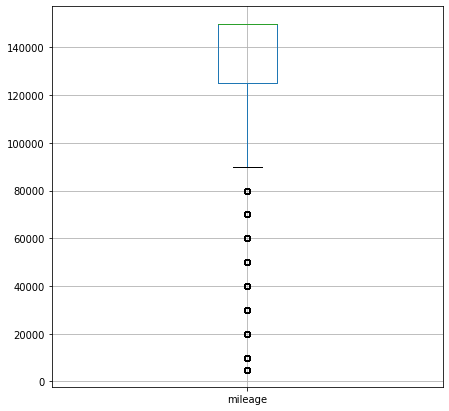

In [21]:
# Create boxplots to examine the distributions of the 'mileage' column
df.mileage.plot(kind='box', figsize = (7, 7), grid = True);


In [25]:
# Use One Hot Encoding to encode the categorical features of 'df'
df = pd.get_dummies(df, columns = ['vehicletype', 'gearbox', 'fueltype', 'brand', 'model', 'notrepaired'])


In [26]:
# Split 'df' into a training, validation, and test set
features = df.drop(['price'], axis=1) # The features consists of all the columns except 'price'
target = df['price'] # The target is the 'price' column

# Use train_test_split to create the training set (60% of the data) and the remaining data
features_train, features_rem, target_train, target_rem = train_test_split(features,
                                                                          target,
                                                                          train_size = 0.6,
                                                                          random_state = 12345)

# Use train_test_split to split the remaining data into the validation and test set (20% of the data each)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem,
                                                                            target_rem,
                                                                            test_size = 0.5,
                                                                            random_state = 12345)


In [27]:
# Normalize the numeric features in 'df'
numeric = ['registrationyear', 'power', 'mileage']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


## Model training

In [26]:
%%time
# Linear Regression Model (for sanity check)
lr_model = LinearRegression()
lr_model.fit(features_train, target_train)
lr_pred_valid = lr_model.predict(features_valid)
lr_rmse = (mean_squared_error(target_valid, lr_pred_valid)) ** 0.5

print("RMSE of the linear regression model on the validation set:", lr_rmse)


RMSE of the linear regression model on the validation set: 221790029489.37454
CPU times: user 12.1 s, sys: 15.5 s, total: 27.6 s
Wall time: 27.7 s


In [27]:
%%time
# Decision Tree algorithm with hyperparameter tuning

# Create a for loop to tune the model's max depth and identify the depth that produces the lowest RMSE value
best_score = float("inf")
best_depth = 0

for depth in range(1, 16):
    dt_model = DecisionTreeRegressor(random_state = 12345, max_depth = depth) # create a model with the given depth
    dt_model.fit(features_train, target_train) # train the model using the training set
    dt_pred_valid = dt_model.predict(features_valid) # get predicted values from the model based on validation set
    score = (mean_squared_error(target_valid, dt_pred_valid)) ** 0.5 # calculate the RMSE value based on the validation set
    if score < best_score: 
        best_score = score # save best RMSE value on validation set
        best_depth = depth # save depth corresponding to best RMSE value
        
print(f'RMSE of the best decision tree model on the validation set (max_depth = {best_depth}): {best_score}')


RMSE of the best decision tree model on the validation set (max_depth = 15): 2025.189141923539
CPU times: user 36.6 s, sys: 3.27 s, total: 39.8 s
Wall time: 39.9 s


In [28]:
%%time
# Random Forest algorithm with hyperparameter tuning
# Create a for loop to tune the model's number of estimators and identify the number that produces the lowest RMSE value
best_score = float("inf")
best_est = 0
for est in range(41, 51): # choose hyperparameter range
    rf_model = RandomForestRegressor(random_state = 12345, n_estimators = est) # set number of trees
    rf_model.fit(features_train, target_train) # train model on training set
    rf_pred_valid = rf_model.predict(features_valid) # get predicted values from the model based on validation set
    score = (mean_squared_error(target_valid, rf_pred_valid)) ** 0.5 # calculate RMSE value on validation set
    if score < best_score:
        best_score = score # save best accuracy score on validation set
        best_est = est # save number of estimators corresponding to best RMSE value

print(f'RMSE of the best random forest model on the validation set (n_estimators = {best_est}): {best_score}')


RMSE of the best random forest model on the validation set (n_estimators = 50): 1748.7582324417533
CPU times: user 26min 8s, sys: 5.28 s, total: 26min 14s
Wall time: 26min 14s


In [65]:
%%time
# LightGBM algorithm with hyperparameter tuning
# Create a for loop to tune the model's learning rate and identify the number that produces the lowest RMSE value
lrs = [.7, 1, 1.3]
best_score = float("inf")
best_est = 0
for lr in lrs:
    gbm = lgb.LGBMRegressor(learning_rate = lr, random_state = 12345) # set learning rate
    gbm.fit(features_train, target_train) # train model on training set
    gbm_pred_valid = gbm.predict(features_valid) # get predicted values from the model based on validation set
    score = (mean_squared_error(target_valid, gbm_pred_valid)) ** 0.5 # calculate RMSE value on validation set
    if score < best_score:
        best_score = score # save best RMSE value on validation set
        best_lr = lr # save learning rate corresponding to best RMSE value

print(f'RMSE of the LightGBM model on the validation set for learning rate of {best_lr}: {best_score}')


RMSE of the LightGBM model on the validation set for learning rate of 0.7: 1763.9962506365064
CPU times: user 15 s, sys: 1.03 s, total: 16 s
Wall time: 16.1 s


In [66]:
%%time
# LightGBM algorithm with hyperparameter tuning
# Create a for loop to tune the model's number of leaves and identify the number that produces the lowest RMSE value
nls = [11, 31, 51]
best_score = float("inf")
best_est = 0
for nl in nls:
    gbm = lgb.LGBMRegressor(learning_rate = 0.7, num_leaves = nl, verbose = 1, random_state = 12345) # set number of leaves
    gbm.fit(features_train, target_train) # train model on training set
    gbm_pred_valid = gbm.predict(features_valid) # get predicted values from the model based on validation set
    score = (mean_squared_error(target_valid, gbm_pred_valid)) ** 0.5 # calculate RMSE value on validation set
    if score < best_score:
        best_score = score # save best RMSE value on validation set
        best_nl = nl # save number of leaves corresponding to best RMSE value
print(f'RMSE of the LightGBM model on the validation set for {best_nl} leaves: {best_score}')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 170475, number of used features: 286
[LightGBM] [Info] Start training from score 4847.839261
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 170475, number of used features: 286
[LightGBM] [Info] Start training from score 4847.839261
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if me

## Model analysis

In [68]:
# Concatenate the training and validation set for use in the following analysis
features_all = features_train.append(features_valid)
target_all = target_train.append(target_valid)


In [32]:
%%time
# Linear Regression Model (fit)
lr_model = LinearRegression()
lr_model.fit(features_all, target_all)


CPU times: user 14.2 s, sys: 5.03 s, total: 19.3 s
Wall time: 19.3 s


LinearRegression()

In [33]:
%%time
# Linear Regression Model (predict)
lr_pred_test = lr_model.predict(features_test)
lr_rmse = (mean_squared_error(target_test, lr_pred_test)) ** 0.5

print(f'RMSE of the linear regression model on the test set: {lr_rmse}')


RMSE of the linear regression model on the test set: 2696.975918470756
CPU times: user 66.4 ms, sys: 68.2 ms, total: 135 ms
Wall time: 112 ms


In [34]:
%%time
# Decision Tree algorithm with hyperparameter tuning (fit)
dt_model = DecisionTreeRegressor(random_state = 12345, max_depth = best_depth)
dt_model.fit(features_all, target_all)


CPU times: user 5.35 s, sys: 272 ms, total: 5.62 s
Wall time: 5.64 s


DecisionTreeRegressor(max_depth=15, random_state=12345)

In [35]:
%%time
# Decision Tree algorithm with hyperparameter tuning (predict)
dt_pred_test = dt_model.predict(features_test)
dt_rmse = (mean_squared_error(target_test, dt_pred_test)) ** 0.5

print(f'RMSE of the best decision tree model on the test set {dt_rmse}')


RMSE of the best decision tree model on the test set 1993.3162570710494
CPU times: user 56.4 ms, sys: 48 ms, total: 104 ms
Wall time: 107 ms


In [40]:
%%time
# Random Forest algorithm with hyperparameter tuning (fit)
rf_model = RandomForestRegressor(random_state = 12345, n_estimators = 50)
rf_model.fit(features_all, target_all)


CPU times: user 4min 1s, sys: 705 ms, total: 4min 2s
Wall time: 4min 2s


RandomForestRegressor(n_estimators=50, random_state=12345)

In [41]:
%%time
# Random Forest algorithm with hyperparameter tuning (predict)
rf_pred_test = rf_model.predict(features_test)
rf_rmse = (mean_squared_error(target_test, rf_pred_test)) ** 0.5

print(f'RMSE of the best random forest model on the test set: {rf_rmse}')
    

RMSE of the best random forest model on the test set: 1704.745700537311
CPU times: user 1.51 s, sys: 60 ms, total: 1.57 s
Wall time: 1.58 s


In [71]:
%%time
# LightGBM algorithm with hyperparameter tuning (fit)
gbm = lgb.LGBMRegressor(learning_rate = best_lr, num_leaves = best_nl, verbose = 1, random_state = 12345)
gbm.fit(features_all, target_all) # train model on training set


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 227300, number of used features: 292
[LightGBM] [Info] Start training from score 4853.669538
CPU times: user 6.61 s, sys: 370 ms, total: 6.98 s
Wall time: 7.03 s


LGBMRegressor(learning_rate=0.7, num_leaves=51, random_state=12345, verbose=1)

In [70]:
%%time
# LightGBM algorithm with hyperparameter tuning (predict)
gbm_pred_test = gbm.predict(features_test)
gbm_rmse = (mean_squared_error(target_test, gbm_pred_test)) ** 0.5

print(f'RMSE of the LightGBM model on the test set: {gbm_rmse}')


RMSE of the LightGBM model on the test set: 1714.6640726446028
CPU times: user 494 ms, sys: 104 ms, total: 598 ms
Wall time: 590 ms


## Conclusions

After the data was explored and cleaned, the categorical features were One Hot Encoded, the data was split into a training, validation, and test set, and the numerical features were normalized. The training data was then used to train the following models and the various RMSE values were calculated based on the subsequent predictions in comparison to the targets from the validation set to hypertune the parameters. Then the tuned models were used to calculate predictions with the test set and RMSE values were calculated for each:

1) Linear Regression: 2696.975918470756

2) Decision Tree Regression: 1993.3162570710494

3) Random Forest Regression: 1704.745700537311

4) LightGBM Regression: 1714.6640726446028

These results indicate that the Linear Regression models yields the poorest results which is expected since it was intended to serve as a means to sanity check the other models. The Decision Tree model yielded a higher RMSE than the Random Forest Regression and the LightGBM Regression models which had very similar RMSE values with the Random Forest Regression performed slightly better than the LightGMB model.

Looking at speed and efficiency, the following are the wall times needed to train the models and yield predictions:

1) Linear Regression: 19.3 s / 112 ms

2) Decision Tree Regression: 5.64 s / 107 ms

3) Random Forest Regression: 4min 2s / 1.58 s

4) LightGBM Regression: 7.03 s / 590 ms

Here you can see that the Linear Regression, Decision Tree, and LightGBM models performed very quickly, all under 20 seconds. The Random Forest model on the otherhand took much longer at over 4 minutes.

Given these results, I would recommend that Rusty Bargain used car sales service should utilize a **LightGBM** model to develop their app since it yields comparable predictions to the Random Forest model but is far faster.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [X ]  Code is error free
- [X ]  The cells with the code have been arranged in order of execution
- [X ]  The data has been downloaded and prepared
- [X ]  The models have been trained
- [X ]  The analysis of speed and quality of the models has been performed